# Controlling quality and kinetics of ASD drying processes 
This notebook reproduces the data, modellings and predictions from the Paper 'Controlling quality and kinetics of ASD drying processes' from Kerkhoff et al.. The index w denotes water, e denotes ethanol, a denotes the API and p denotes the polymer
In this notebook, the parameters are defined all at once while their context is given in the consecutive cells

In [1]:
import numpy as np
from diffusionpy import Diffusion_MS
import matplotlib.pyplot as plt

T=303.15
p=1E5
Dwe=1E-6 # Water Ethanol diffusion coefficient. It is just the highest value to achieve that diffusion of water through ethanol is not rate limiting
Dwa=1.13E-8 # water polymer diffusion coefficient
Dwp=1.13E-8 # water api diffusion coefficient. Just chosen to be the same as the polymer 
Dep=4.318E-7 # ethanol  polymer diffusion coefficient. 
Dea=4.318E-7 # ethanol api diffusion coefficient. . Just chosen to be the same as the polymer 
Dpa=1.00E-21 
Dvec=np.asarray([Dwe,Dwp,Dwa,Dep,Dea,Dpa])
mobile=np.asarray([True,True,False,False])
tauw=35711.02587 # mass transfer coefficient of water
taue=14926.924 # mass transfer coefficient of ethanol
taui=np.asarray([tauw,taue])
kwe,kwehb = -0.045000,  0.000000000
kwa,kwahb = -0.022000,  0.000000000
kwp,kwphb = -0.128000,  0.000000000
kea,keahb = -0.001000,  0.000000000
kep,kephb =  0.002673, -0.455211419
kpa,kpahb = -0.062100,  0.000000000
kijvec=np.asarray([kwe,kwa,kwp,kea,kep,kpa]) # the kij need to defined in this order where all combinations are given starting with the first component 
kijHBvec=np.asarray([kwehb,kwahb,kwphb,keahb,kephb,kpahb])
Mw=18.015 # Molar mass water g/mol
Me=46.069 # Molar mass ethanol g/mol
Ma=357.79 # Molar mass indomethacin g/mol
Mp=65000 # Molar mass PVVPVA g/mol
Mi=np.asarray([Mw,Me,Ma,Mp]) # the rest of the pc-saft parameters are defined the the same manner and order
mi=np.asarray([1.2047,2.3827,14.283,2420.99])
sigi=np.asarray([2.79533,3.1771,3.535,2.947])
ui=np.asarray([353.95,198.24,262.791,205.27])
epsAiBi=np.asarray([2425.7,2653.4,886.4,0.])
kAiBi=np.asarray([0.045099,0.032384,0.02,0.02])
Na=np.asarray([1.,1.,3.,653.])
t=np.linspace(0.,(60*2000)**0.5,51)**2

par={"mi":mi,
"si": sigi,
"ui" :ui,
"eAi" :epsAiBi,
"kAi":kAiBi,
"NAi":Na,
"Mi": Mi,
"kij":kijvec,
"kijA":kijHBvec}
nz=20

We start by modeling the **water drying of the PVPVA**. The parameters **Dwp and tauw** were adjusted to this data 

Text(0, 0.5, '$w_i$/-')

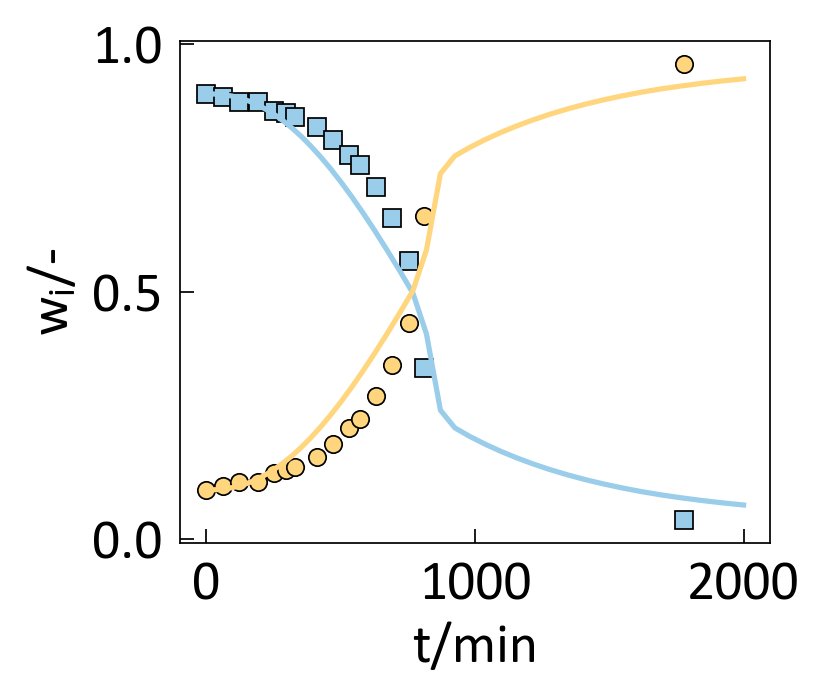

In [2]:
texpw=np.asarray([0,60,120,193,250,296,330,410,470,530,570,630,691,754,810,1780])
wexpw=np.asarray([0.9,0.89299,0.8846,0.88365,0.86635,0.86052,0.8531,0.83376,0.8072,0.77584,0.75664,0.71119,0.64861,0.56269,0.34671,0.03925])

L=0.016 

wi0=np.asarray([0.9,0.,0.,0.1])
wi8=np.asarray([0.03925,0.,0.,1-0.03925])


wt=Diffusion_MS(t,L,Dvec,wi0,wi8,mobile,taui=taui,saftpar=par,nz=nz)[0]
fig,ax=plt.subplots()
ax.plot(texpw,wexpw,'C1s')
ax.plot(texpw,1-wexpw,'C5o')

ax.plot(t/60,wt[:,0],'C1-')
ax.plot(t/60,wt[:,3],'C5-')
ax.set_xlabel("t/min")
ax.set_ylabel("$w_i$/-")


Next we look at the modeling of the **ethanol drying of the PVPVA**. The parameters **Dep and taue** were adjusted to this data 

Text(0, 0.5, '$w_i$/-')

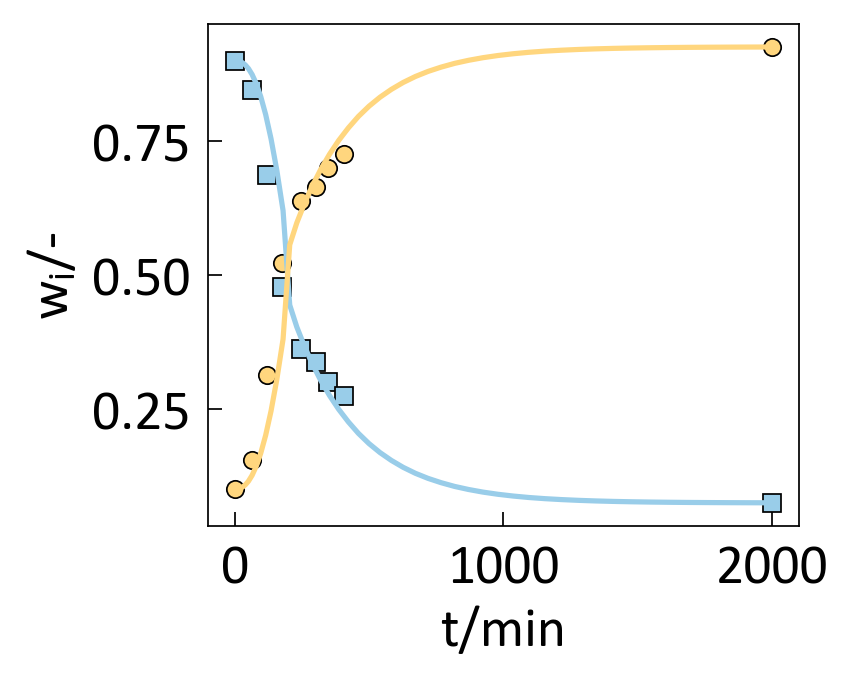

In [3]:
wi0=np.asarray([0.,0.9,0.,0.1])
wi8=np.asarray([0.,0.07407,0.,1-0.07407])
texpe=np.asarray([0,64,120,177,247,301,347,407,2000])
wexpe=np.asarray([0.9,0.84537,0.68653,0.47765,0.36149,0.33674,0.29972,0.27454,0.07407])
L=0.021


wt=Diffusion_MS(t,L,Dvec,wi0,wi8,mobile,taui=taui,saftpar=par,nz=nz)[0]

fig,ax=plt.subplots()
ax.plot(texpe,wexpe,'C1s')
ax.plot(texpe,1-wexpe,'C5o')
ax.plot(t/60,wt[:,1],'C1-')
ax.plot(t/60,wt[:,3],'C5-')
ax.set_xlabel("t/min")
ax.set_ylabel("$w_i$/-")


Then, we look at the prediction of the **ethanol and water drying of the PVPVA**. No parameters were adjusted to this data 

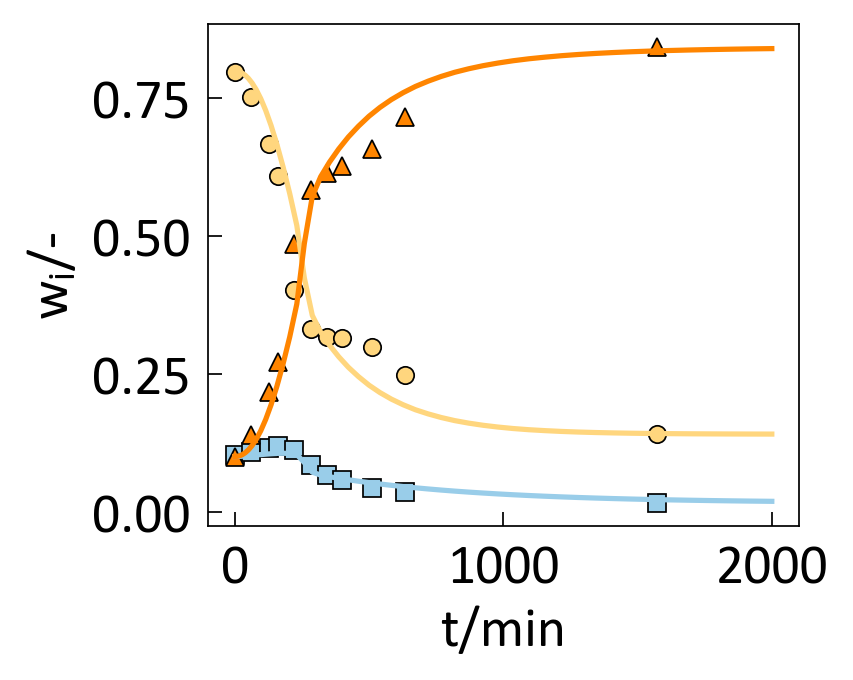

In [4]:
texpp=np.asarray([0,60,128,160,222,283,343,400,510,635,1572])
wexpp1=np.asarray([0.10222,0.10793,0.11579,0.11968,0.11112,0.08517,0.06692,0.05747,0.04321,0.03578,0.01578])
wexpp2=np.asarray([0.79779,0.75332,0.66681,0.60852,0.40236,0.33188,0.31786,0.31535,0.29871,0.24788,0.14054])
wexpp3=np.asarray([0.1,0.13875,0.21739,0.2718,0.48652,0.58294,0.61522,0.62718,0.65808,0.71633,0.84368])

L=0.0185
wi0=np.asarray([0.1,0.8,0.,0.1])
wi8=np.asarray([0.01578,0.14054,0.,0.84368])

wt=Diffusion_MS(t,L,Dvec,wi0,wi8,mobile,taui=taui,saftpar=par,nz=nz)[0]

fig3,ax=plt.subplots()
ax.plot(texpp,wexpp1,'C1s')
ax.plot(texpp,wexpp2,'C5o')
ax.plot(texpp,wexpp3,'C3^')

ax.plot(t/60,wt[:,0],'C1-')
ax.plot(t/60,wt[:,1],'C5-')
ax.plot(t/60,wt[:,3],'C3-')
ax.set_xlabel("t/min")
ax.set_ylabel("$w_i$/-")
plt.show()


Finally we look at the prediction of the **ethanol and water drying of the PVPVA- Indomethacin ASD**. No parameters were adjusted to this data 


(0.0, 1.0)

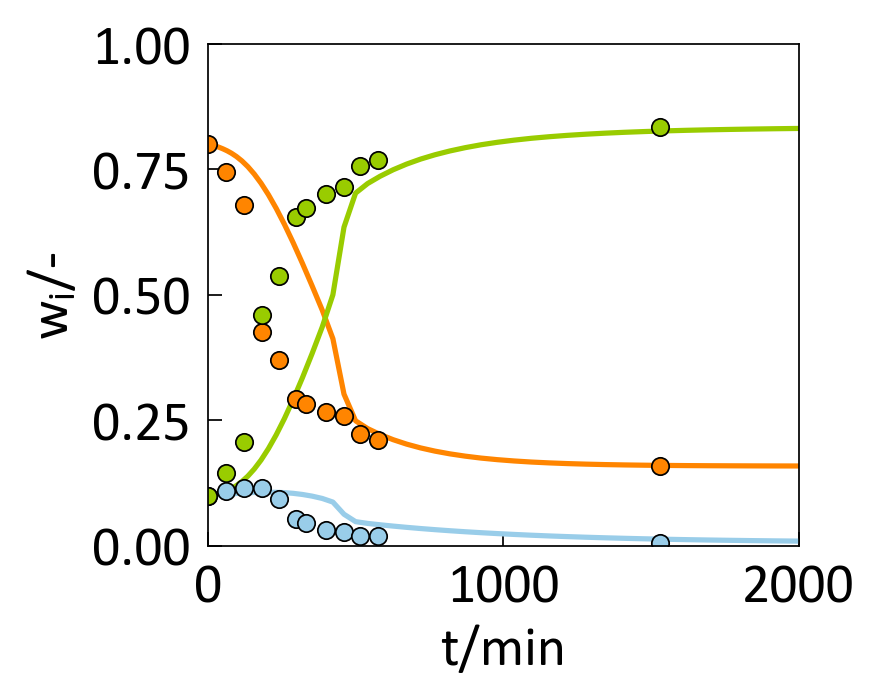

In [5]:
L=0.0185 
dl0=0.3
we0=0.8
ww0=0.1
wf0=1-we0-ww0
wi0=np.asarray([ww0,we0,dl0*wf0,(1-dl0)*wf0])

we8=0.158725973
ww8=0.005951831
wf8=1-we8-ww8
wi8=np.asarray([ww8,we8,dl0*wf8,(1-dl0)*wf8])
wt=Diffusion_MS(t,L,Dvec,wi0,wi8,mobile,taui=taui,saftpar=par,nz=nz)[0]

texp=np.asarray([0,61,121,183,241,299,331,400,460,515,575,1530])
w1exp=np.asarray([0.1,0.10815,0.11449,0.11544,0.09219,0.05345,0.04536,0.03188,0.02658,0.01856,0.01963,0.00595])
w2exp=np.asarray([0.8,0.74591,0.6785,0.42536,0.36927,0.29222,0.28234,0.26616,0.2587,0.22371,0.21173,0.15873])
w3exp=np.asarray([0.1,0.14594,0.207,0.4592,0.53854,0.65433,0.6723,0.70197,0.71472,0.75774,0.76864,0.83532])

fig,ax=plt.subplots()
ax.plot(t/60,wt[:,0],'C1-')
ax.plot(t/60,wt[:,1],'C3-')
ax.plot(t/60,wt[:,2]+wt[:,3],'C0-')
ax.plot(texp,w1exp,'C1o')
ax.plot(texp,w2exp,'C3o')
ax.plot(texp,w3exp,'C0o')
ax.set_xlabel("t/min")
ax.set_ylabel("$w_i$/-")

plt.xlim([0,2000])
plt.ylim([0,1])